In [2]:
library(keras)
library(EBImage)
library(repr)

In [3]:
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\convolutional-nn\\images")
train_file_list <- c("cat1.jpg", "cat2.jpg", "cat3.jpg", "cat4.jpg", "cat5.jpg",
                "dog1.jpg", "dog2.jpg", "dog3.jpg", "dog4.jpg", "dog5.jpg",
                "chick1.jpg", "chick2.jpg", "chick3.jpg", "chick4.jpg", "chick5.jpg",
                "bun1.jpg", "bun2.jpg", "bun3.jpg", "bun4.jpg", "bun5.jpg")
train_file_list <- sample(train_file_list)

In [4]:
train_animal_pic <- list()
for (i in 1:length(train_file_list)) {train_animal_pic[[i]] <- readImage(train_file_list[i])}

In [5]:
test_file_list <- c("cat6.jpg",
                "dog6.jpg",
                "chick6.jpg",
                "bun6.jpg")
test_file_list <- sample(test_file_list)
test_animal_pic <- list()
for (i in 1:length(test_file_list)) {test_animal_pic[[i]] <- readImage(test_file_list[i])}

In [6]:
print(train_animal_pic[[12]])

Image 
  colorMode    : Color 
  storage.mode : double 
  dim          : 477 612 3 
  frames.total : 3 
  frames.render: 1 

imageData(object)[1:5,1:6,1]
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    1    1    1    1    1
[2,]    1    1    1    1    1    1
[3,]    1    1    1    1    1    1
[4,]    1    1    1    1    1    1
[5,]    1    1    1    1    1    1


In [7]:
summary(train_animal_pic[[12]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.8196  1.0000  0.8894  1.0000  1.0000 

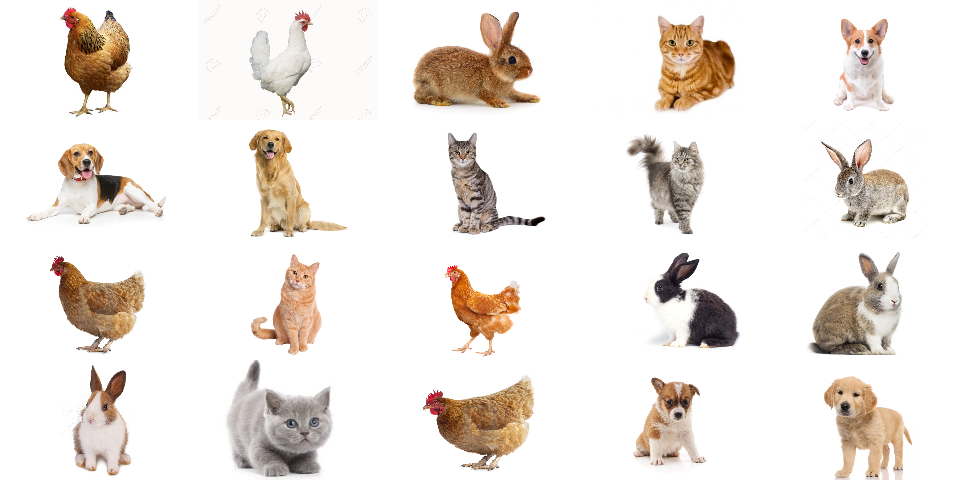

In [8]:
par(mfrow=c(4,5))
options(repr.plot.width=8, repr.plot.height=4)
for (i in 1:length(train_animal_pic)) {plot(train_animal_pic[[i]])}
par(mfrow=c(1,1))

In [9]:
str(train_animal_pic)

List of 20
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:308, 1:450, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 308 450 3
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:1300, 1:870, 1:3] 0.988 0.988 0.988 0.988 0.988 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 1300 870 3
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:800, 1:619, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 800 619 3
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:340, 1:265, 1:3] 0.996 0.996 0.996 0.996 0.996 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 340 265 3
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:612, 1:408, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 612 408 3
 $ :Formal class 'Image' [package "EB

In [10]:
for (i in 1:length(train_animal_pic)) {train_animal_pic[[i]] <- resize(train_animal_pic[[i]], 100, 100)}
for (i in 1:length(test_animal_pic)) {test_animal_pic[[i]] <- resize(test_animal_pic[[i]], 100, 100)}

In [11]:
str(train_animal_pic)

List of 20
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:100, 1:100, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 100 100 3
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:100, 1:100, 1:3] 0.988 0.988 0.988 0.988 0.988 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 100 100 3
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:100, 1:100, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 100 100 3
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:100, 1:100, 1:3] 0.996 0.996 1 1 1 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 100 100 3
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:100, 1:100, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
  .. ..$ dim: int [1:3] 100 100 3
 $ :Formal class 'Image' [package "EBImage"] with 2

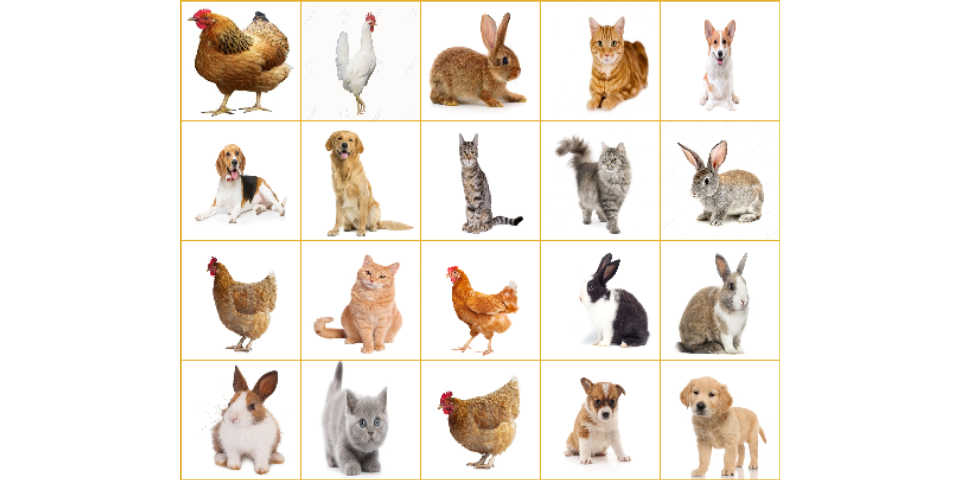

In [12]:
train <- combine(train_animal_pic)
x <- tile(train, 5)
display(x, title="Train Images")

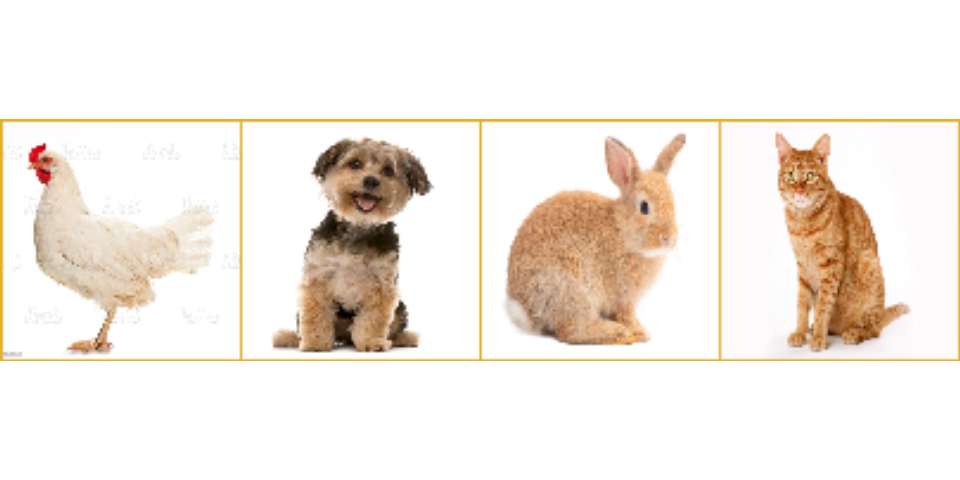

In [13]:
test <- combine(test_animal_pic)
y <- tile(test, 4)
display(y, title="Test Images")

In [14]:
str(train)

Formal class 'Image' [package "EBImage"] with 2 slots
  ..@ .Data    : num [1:100, 1:100, 1:3, 1:20] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ colormode: int 2
  ..$ dim: int [1:4] 100 100 3 20


In [15]:
train_abind <- abind(train_animal_pic, along = 4)
str(train_abind)

Formal class 'Image' [package "EBImage"] with 2 slots
  ..@ .Data    : num [1:100, 1:100, 1:3, 1:20] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ colormode: int 2
  ..$ dim: int [1:4] 100 100 3 20


In [284]:
str(test)

Formal class 'Image' [package "EBImage"] with 2 slots
  ..@ .Data    : num [1:100, 1:100, 1:3, 1:4] 0.988 0.988 0.988 0.988 0.988 ...
  ..@ colormode: int 2


In [285]:
train <- aperm(train, c(4, 1, 2, 3))
test <- aperm(test, c(4, 1, 2, 3))

In [286]:
str(train)

 num [1:20, 1:100, 1:100, 1:3] 1 1 1 1 1 ...


In [287]:
str(test)

 num [1:4, 1:100, 1:100, 1:3] 0.988 1 1 0.992 0.988 ...


In [288]:
train_y <- c(0, 1, 3, 2, 3,
             1, 2, 3, 2, 0,
             1, 2, 3, 1, 0,
             2, 1, 3, 0, 0)
test_y <- c(0, 1, 2, 3)

In [289]:
train_labels <- to_categorical(train_y)
test_labels <- to_categorical(test_y)

In [300]:
model <- keras_model_sequential()
model %>%
    layer_conv_2d(filters=32, kernel_size=c(3,3), activation="relu", input_shape=c(100,100,3)) %>%
    layer_conv_2d(filters=64, kernel_size=c(3,3), activation="relu") %>%
    layer_max_pooling_2d(pool_size=c(2,2)) %>%
    layer_dropout(rate=0.4) %>%

    layer_conv_2d(filters=32, kernel_size=c(3,3), activation="relu") %>%
    layer_conv_2d(filters=64, kernel_size=c(3,3), activation="relu") %>%
    layer_max_pooling_2d(pool_size=c(2,2)) %>%
    layer_dropout(rate=0.2) %>%

    layer_flatten() %>%

    layer_dense(units=512, activation="relu") %>%
    layer_dropout(rate=0.3) %>%

    layer_dense(units=4, activation="softmax") %>%
    compile(loss="categorical_crossentropy",
            optimizer=optimizer_sgd(lr=0.001, decay=1e-6, momentum=0.9, nesterov=T),
            metrics=c("accuracy"))
summary(model)

Model: "sequential_33"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_128 (Conv2D)                 (None, 98, 98, 32)              896         
________________________________________________________________________________
conv2d_129 (Conv2D)                 (None, 96, 96, 64)              18496       
________________________________________________________________________________
max_pooling2d_71 (MaxPooling2D)     (None, 48, 48, 64)              0           
________________________________________________________________________________
dropout_104 (Dropout)               (None, 48, 48, 64)              0           
________________________________________________________________________________
conv2d_130 (Conv2D)                 (None, 46, 46, 32)              18464       
________________________________________________________________________________
conv2

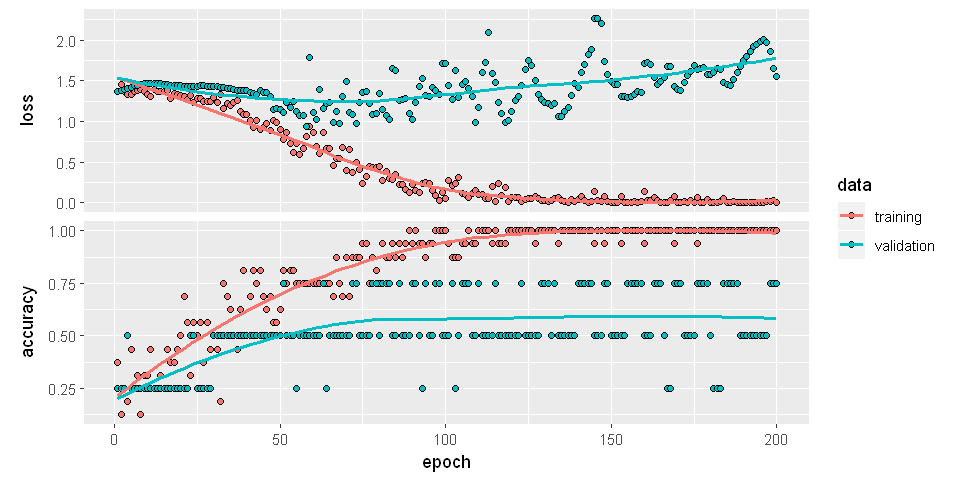

In [301]:
history <- model %>%
    fit(train,
        train_labels,
        epochs=200,
        batch_size=32,
        validation_split=0.2,
        validation_data=list(test, test_labels))
plot(history)

In [302]:
model %>% evaluate(train, train_labels)

loss  accuracy 
0.3136049 0.9500000

In [303]:
pred <- model %>% predict_classes(train)
table(Predicted = pred, Actual = train_y)

         Actual
Predicted 0 1 2 3
        0 4 0 0 0
        1 1 5 0 0
        2 0 0 5 0
        3 0 0 0 5

In [304]:
model %>% evaluate(test, test_labels)

loss  accuracy 
0.8655323 0.7500000

In [305]:
pred <- model %>% predict_classes(test)
table(Predicted = pred, Actual = test_y)

         Actual
Predicted 0 1 2 3
        1 1 1 0 0
        2 0 0 1 0
        3 0 0 0 1